# Running open AR-Sandbox without a sandbox - GemPy example

The software can also be run in fully virtual mode, without an AR-Sandbox attached to it - for example to test new implementations or to evaluate the software itself, before investing time or funds to obtain an AR-Sandbox.

For this purpose, the sensor can be set to a `dummy`-sensor and a DEM can be loaded (for example from a previously saved version, or one of the DEM's supplied as additional data sets - more info below).

We show here an example with the **gempy-module** - the method can, of course, also be combined with other modules (see other notebook for topography example).

**Difference to other notebooks**: stripped-down version to essentials - code as much as possible combined in single cells.

## Load modules and initialize dummy Sensor and Projector

**Notes**: 

- This version uses a dummy sensor (can be changed to kinect_v2 for AR Sandbox Versiono)
- When all commands are completed, a separate window with the projection will open

In [18]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
# os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"
#import gempy
import gempy as gp
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"
#Import Sensor
from sandbox.sensor import Sensor
# sensor = Sensor(calibsensor=_calibsensor, name="dummy",  width=512, height=424)
# sensor = Sensor(calibsensor=_calibsensor, name="dummy",  width=400, height=416)
sensor = Sensor(calibsensor=_calibsensor, name="dummy",  width=450, height=366)



#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.
sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready
sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:63772
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!



## Load test data


We now load topography data - here from one of the digital evlevation models supplied with open-AR-Sandbox (if the file is not found, then download the dataset with the `Download_datasets.ipynb` notebook):

## Initialize main thread for live update

In [19]:
import numpy as np

# file = np.load(test_data['topo'] + "DEM1.npz")
file = np.load("..\\..\\06_LoadSaveTopoModule\saved_DEMs\DEM1.npz")
frame = file['arr_0'] # + np.min(file['arr_0'])
extent = np.asarray([0, frame.shape[1], 0, frame.shape[0], frame.min(), frame.max()])
frame -= np.min(frame)

# Initialize main thread for live update
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

# load the DEM model as frame and stop updating 
main.load_frame(frame)
# Start the thread 
main.run()

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Sun Mar 20 10:40:09 2022
sandbox.projector.cmap: INFO | CmapModule loaded successfully
sandbox.main_thread: INFO | loaded
sandbox.main_thread: INFO | Thread started or resumed...


### How to set features

in `sb_params`, for example:

In [20]:
main.sb_params['active_shading'] = False
main.sb_params['active_contours'] = True
main.update()

In [21]:
main.sb_params.keys()

dict_keys(['frame', 'ax', 'set_colorbar', 'set_legend', 'extent', 'box_dimensions', 'marker', 'cmap', 'norm', 'active_cmap', 'active_shading', 'active_contours', 'same_frame', 'lock_thread', 'trigger', 'del_contour'])

In [22]:
main.sb_params['extent']
main.sb_params['box_dimensions']

[1000, 800]

In [23]:
# in the case of a loaded frame, the info is stored in main.previous_frame:

# main._loaded_frame  # boolean to check if fixed frame is loaded
main.previous_frame.shape

(150, 200)

In [24]:
150 * 200

30000

In [8]:
# main.widget_plot_module()

## Initialize the gempy module 

In [25]:
# main.stop()
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = None, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = True,
                  name_example = ['Horizontal_layers', 'Recumbent_fold', 'Anticline', 'Pinchout', 'Fault', 'Unconformity'], )

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            2289.1
$C_o$            124762
drift equations  [3, 3]
Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            2289.1
$C_o$            124762
drift equations  [3, 3]
Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            2289.1
$C_o$            124762
drift equations  [3, 3]
Active gri

## Add the module to the main thread

In [26]:
gpsb.grid.empty_depth_grid.shape

(30000, 2)

In [27]:
gpsb.grid.model_extent

array([   0., 1000.,    0., 1000.,    0., 1800.])

In [28]:
gpsb.grid.sensor_extent

[0, 200, 0, 150, 0, 320]

In [29]:
262 * 208

54496

In [30]:
main.add_module(name='gempy', module=gpsb)
main.run()

sandbox.main_thread: INFO | module gempy added to modules
sandbox.main_thread: INFO | Thread already running.


In [31]:
main.modules['gempy']
main.sb_params.keys()

dict_keys(['frame', 'ax', 'set_colorbar', 'set_legend', 'extent', 'box_dimensions', 'marker', 'cmap', 'norm', 'active_cmap', 'active_shading', 'active_contours', 'same_frame', 'lock_thread', 'trigger', 'del_contour'])

In [40]:
#Turn on Hill Shading
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = True
gpsb.show_only_faults = False
gpsb.show_fill_contour = False


In [38]:
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


## Change between models

scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.2500000000000002, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections']

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(button_type='success', name='Model selector', options=['Horizontal_layers', ...], value='Horizontal_layers')
    [2] Matplotlib(Figure, height=500)
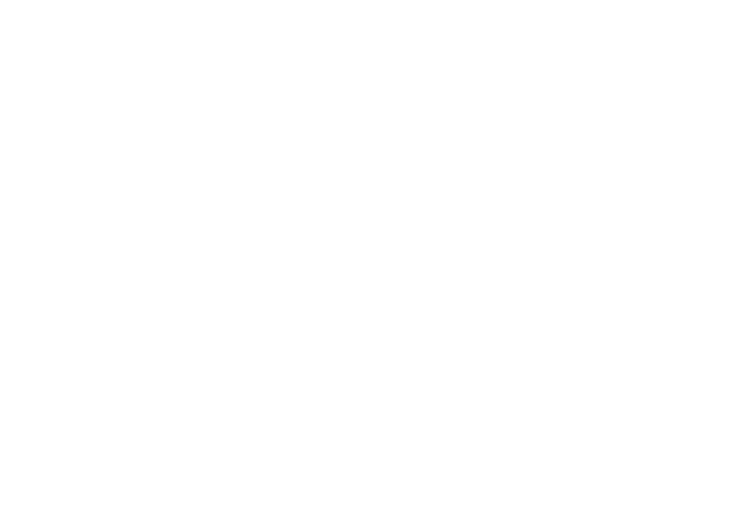

In [33]:
widget = gpsb.widget_model_selector()
widget

In [37]:
#Stop Thread







main.stop()

sandbox.main_thread: INFO | Thread stopped.


## Cross section with aruco markers
There can only be 2 aruco markers displayed in the model

In [ ]:
if len(gpsb.modelspace_arucos) == 2 and 'Aruco_section' in gpsb.model_sections_dict.keys():
    _ = gpsb.show_cross_section("Aruco_section")
else:
    print('Only 2 aruco markers can be present to work')

## Show boreholes with arucos

In [ ]:
main.stop()
gpsb._get_polygon_data()
if len(gpsb.borehole_tube) > 0:
    p = gpsb.plot_boreholes(notebook=False, background=False)
    p.show()
main.run()

## Pyvista 3d model

In [ ]:
main.stop()
gpsb.plot_3d_model()
main.run()